We are performing **Otsu's Thersholding for Binarization** of an image.

Pre Running Code:
- We will access the files section and upload our 4 images on the session storage.
- bookpage_1.jpeg is the first image.
- bookpage_2.jpeg is the second image.
- panther.jpeg is the third image.
- tom.jpeg is the fourth image.
- Here after, we will run all code blocks.



# Procedure

**Histogram and Formation into Greyscale - Function Body**
- Here I have first opened my images as greyscale images.
- Hereafter, I have printed them in their original form, besides their frequency vs pixel intensity histogram

**Otsu's Method - Function Body**
- This is where I have coded out the Otsu's method based on this [article](https://en.wikipedia.org/wiki/Otsu%27s_method).

**Greyscale Images and their Histogram**
- Here I have simply performed the part 1 on all of our 4 images.

**Binarization of Image - without adding Gaussian Noise**
- This is the code block where I have performed Otsu's method of Binarization using thresholding. I have invoked my Otsu's method, declared above.
- In this step, I have directly performed Binarization on the original image.

**Binarization of Image - after adding Gaussian Noise**
- Here I have defined a function that generates gaussian noise based on an input variance.
- This Gaussian noise is added to my original image.
- Part 1 : keeping variance relatively low I perform Otsu's method on my noisy image.
- Part 2 : keeping variance relatively high I do the same again.

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# Histogram and Formation into Greyscale - Function Body

In [ ]:
def openImage(path):
    img = Image.open(path).convert("L")
    img_array = np.array(img)
    return img_array

def histogramImage(imgArray,path):

    fig, axs = plt.subplots(1, 2, figsize=(24, 6))

    axs[0].imshow(imgArray, cmap='gray')
    axs[0].set_title(f'Grayscale Image: {path}')

    pixel_values = [pixel for row in imgArray for pixel in row]
    pixel_values = np.array(pixel_values)

    axs[1].hist(pixel_values, bins=256, range=(0, 256), density=True, color='lightblue', alpha=0.7)
    axs[1].set_title('Pixel Intensity Histogram')
    axs[1].set_xlabel('Pixel Intensity')
    axs[1].set_ylabel('Frequency')
    axs[1].set_title(f'Distribution of {path}')

    plt.show()
    return pixel_values

# Otsu's Method - Function Body


In [ ]:
def otsu_method(pixel_values):
    threshold_list = []

    for t in range(256):
        hist, bins = np.histogram(pixel_values, 256, [0, 256])
        w1 = np.sum(hist[:t+1]) / len(pixel_values)
        w2 = np.sum(hist[t+1:]) / len(pixel_values)

        u1 = np.sum(np.arange(t+1) * hist[:t+1]) / (len(pixel_values) * w1) if w1 != 0 else 0
        u2 = np.sum(np.arange(t+1, 256) * hist[t+1:]) / (len(pixel_values) * w2) if w2 != 0 else 0

        s1 = np.sum(((np.arange(t+1) - u1) ** 2) * hist[:t+1]) / (len(pixel_values) * w1) if w1 != 0 else 0
        s2 = np.sum(((np.arange(t+1, 256) - u2) ** 2) * hist[t+1:]) / (len(pixel_values) * w2) if w2 != 0 else 0

        s = w1 * s1 + w2 * s2

        threshold_list.append([t, s])

    min_threshold_index = np.argmin(np.array(threshold_list)[:, 1])

    return min_threshold_index

# Greyscale Images and their Histogram

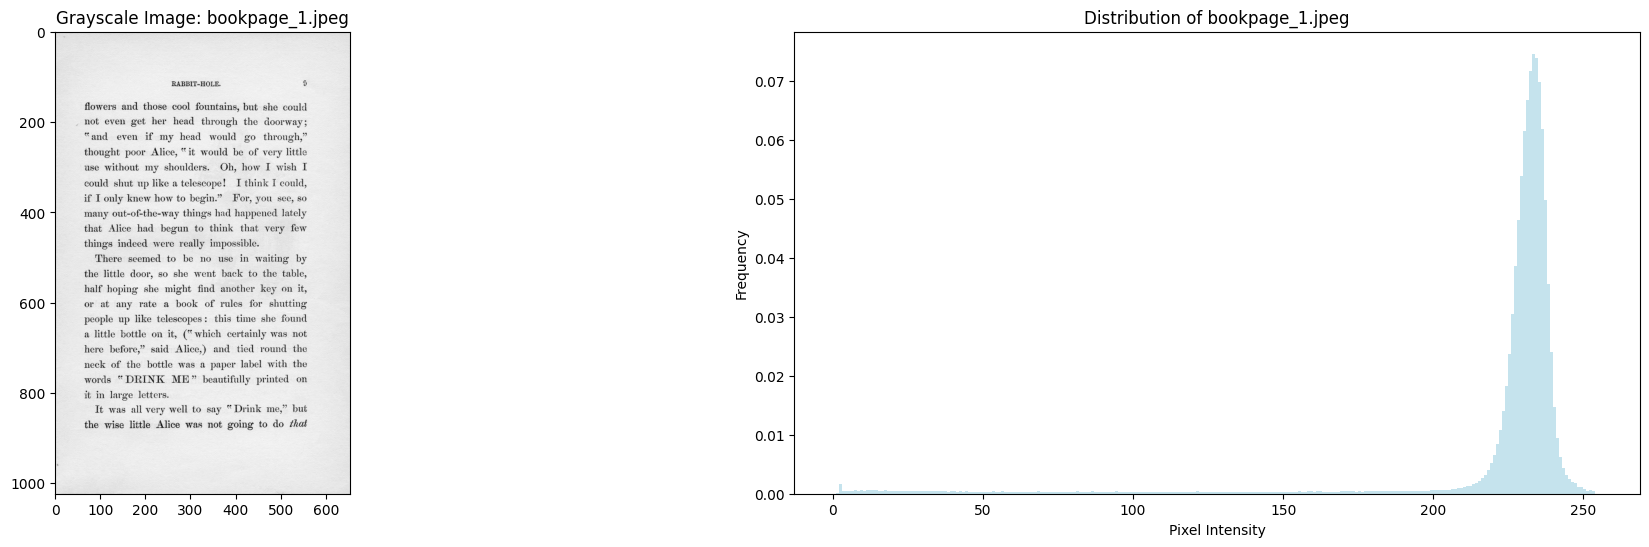

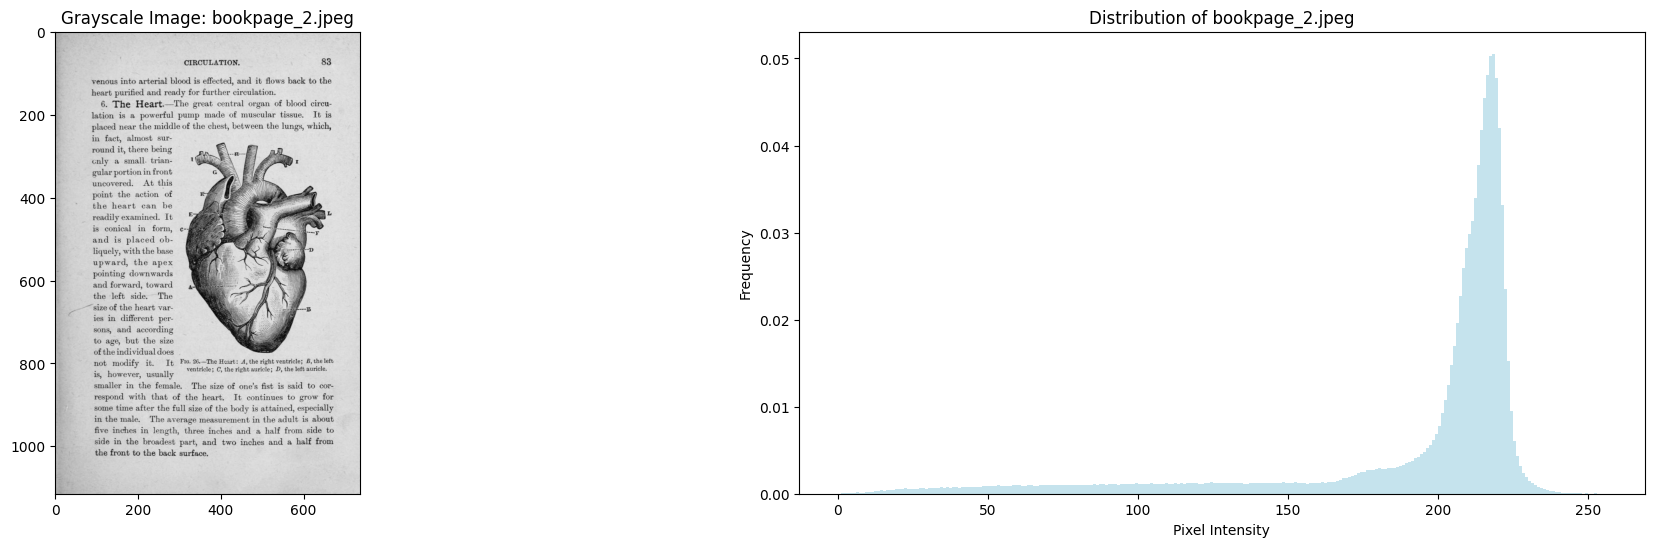

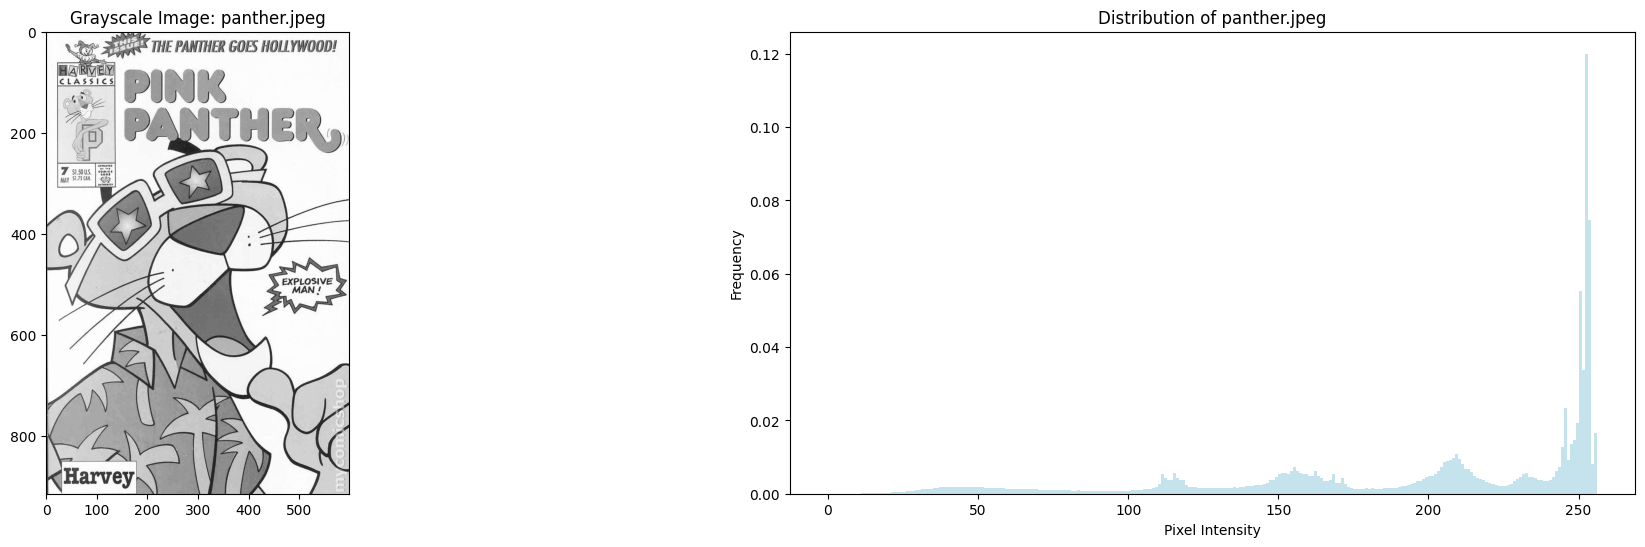

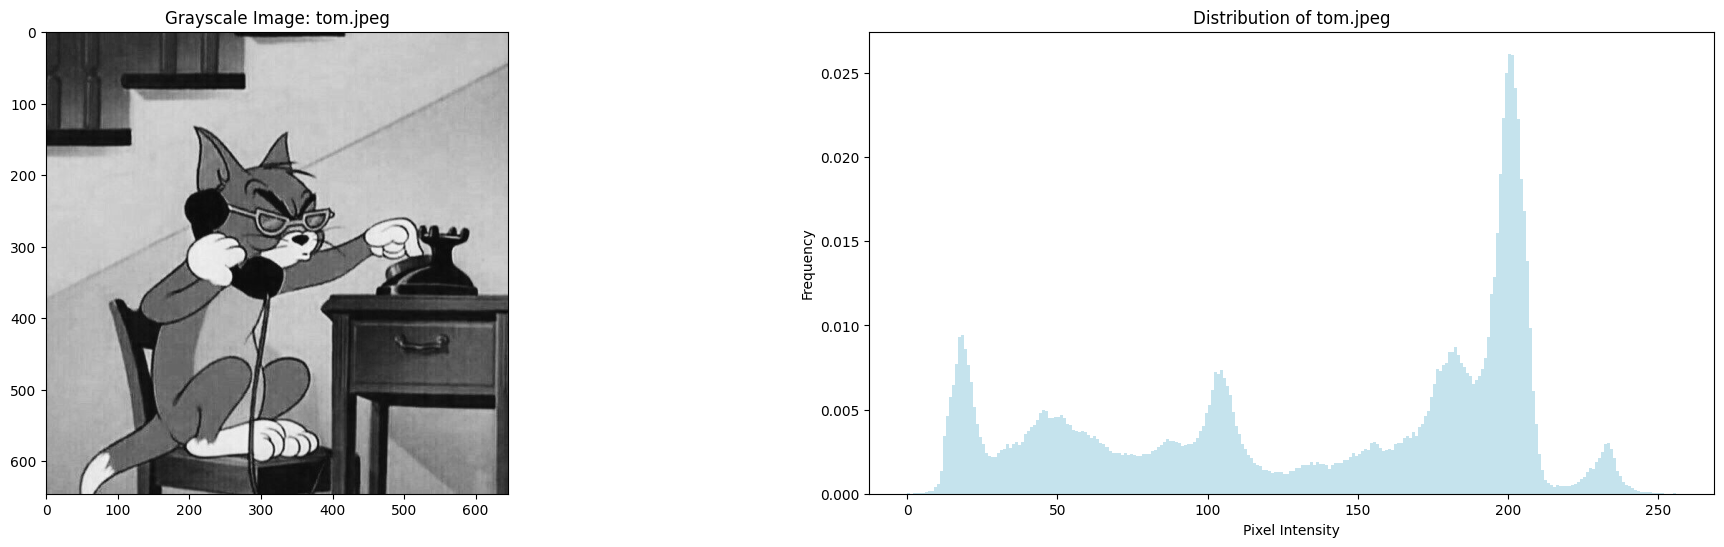

In [ ]:
path_tuple = ("bookpage_1.jpeg", "bookpage_2.jpeg","panther.jpeg","tom.jpeg" )

threshold_list=[]

for p in path_tuple:
  pixel_values_img = histogramImage(openImage(p),p)
  threshold=otsu_method (pixel_values_img)
  threshold_list.append(threshold)

# Binarization of Image - without adding Gaussian Noise




In [ ]:
def output_save(path,t):
  new_pixel_array=openImage(path)

  for row in range(len(new_pixel_array)):
    for pixel in range( len(new_pixel_array[row]) ):
     if new_pixel_array[row][pixel]>=t:
      new_pixel_array[row][pixel]=255
     else:
      new_pixel_array[row][pixel]=0

  fname = "binarized_"+path.replace( "jpeg" ,"")+".png"

  saveImage(new_pixel_array, fname ,path)

def saveImage(pixel_array, output_path, path):
    img_original = Image.open(path).convert("L")
    img_array_original = np.array(img_original)

    plt.subplot(1, 2, 1)
    plt.imshow(img_array_original, cmap='gray')
    plt.title(f'Original Image {path}')

    image = Image.fromarray(pixel_array)
    image.save(output_path)

    plt.subplot(1, 2, 2)
    plt.imshow(pixel_array, cmap='gray')
    plt.title(output_path)

    plt.show()

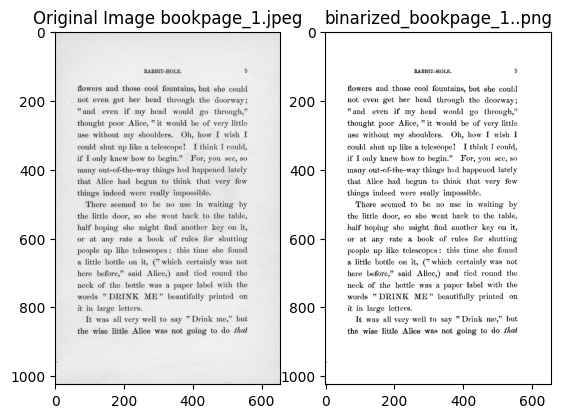

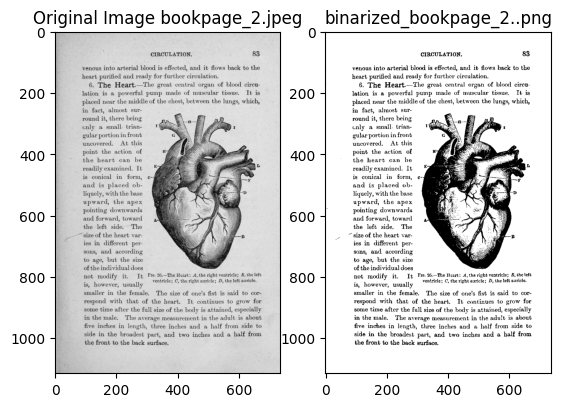

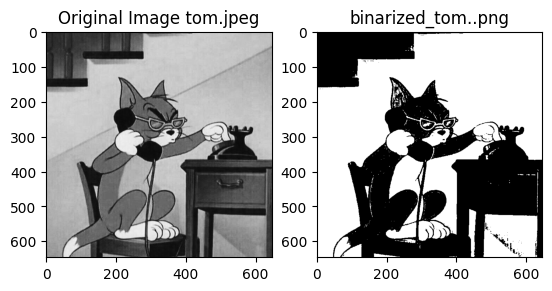

In [ ]:
for p in range(len(path_tuple)):
  output_save(path_tuple[p],threshold_list[p])

# Binarization of Image - after adding Gaussian Noise

**Part 1 = Loud Noise (High Variance)**

**Part 2 = Low Noise (Less Variance)**

In [ ]:
def G_noise(img_array,var):
  noise = np.random.normal(0,np.sqrt(var),img_array.shape)
  noisy = img_array + noise
  noisy = np.clip(noisy,0,255)
  noisy = noisy.astype(np.uint8)
  return noisy

# Relatively Low Noise (Variance = 10)

In [ ]:
path_tuple = ("bookpage_1.jpeg", "bookpage_2.jpeg","panther.jpeg","tom.jpeg" )
threshold_list_new=[]
noisy_images = []

for p in path_tuple:
  img = Image.open(p).convert("L")
  img_array = np.array(img)

  img_array_noisy = G_noise(img_array,100) #Low Variance
  noisy_images.append(img_array_noisy)

  threshold=otsu_method (img_array_noisy)
  threshold_list_new.append(threshold)

In [ ]:
def output_save_version2(noisy_array,path,t,s):
  new_pixel_array=np.zeros(noisy_array.shape, dtype=np.uint8)

  for row in range(len(new_pixel_array)):
    for pixel in range( len(new_pixel_array[row]) ):
     if noisy_array[row][pixel]>=t:
      new_pixel_array[row][pixel]=255
     else:
      new_pixel_array[row][pixel]=0

  fname = f"Noisy{s}_binarized_"+path.replace( "jpeg" ,"")+".png"

  saveImage(new_pixel_array, fname,path, noisy_array)

def saveImage(pixel_array, output_path, path, noisy_array):

    img_original = Image.open(path).convert("L")
    img_array_original = np.array(img_original)

    img_noisy = np.array(noisy_array)


    plt.figure(figsize=(12, 4))

    # Original Image
    plt.subplot(1, 3, 1)
    plt.imshow(img_array_original, cmap='gray')
    plt.title(f'Original Image')

    # Save processed image
    processed_image = Image.fromarray(pixel_array)
    processed_image.save(output_path)

    # Noisy Image
    plt.subplot(1, 3, 2)
    plt.imshow(noisy_array, cmap='gray')
    plt.title('Noisy Image')

    # Processed Image
    plt.subplot(1, 3, 3)
    plt.imshow(pixel_array, cmap='gray')
    plt.title(f'Processed Image')

    plt.tight_layout()
    plt.show()


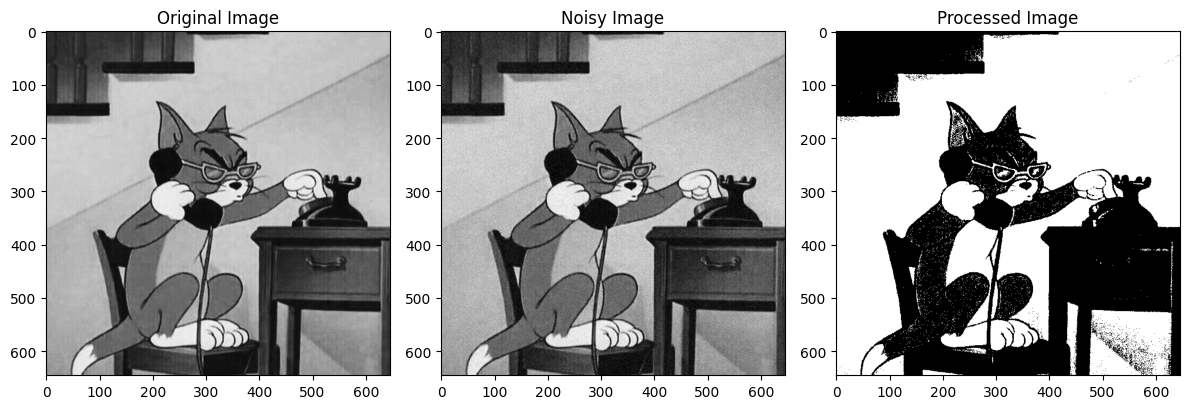

In [ ]:
for p in range(len(path_tuple)):
  output_save_version2(noisy_images[p],path_tuple[p],threshold_list[p],"Low")

# Relatively High Noise (Variance = 100000)

In [ ]:
path_tuple = ("bookpage_1.jpeg", "bookpage_2.jpeg","panther.jpeg","tom.jpeg" )
threshold_list_new=[]
noisy_images = []

for p in path_tuple:
  img = Image.open(p).convert("L")
  img_array = np.array(img)

  img_array_noisy = G_noise(img_array,10000) #High Variance
  noisy_images.append(img_array_noisy)

  threshold=otsu_method (img_array_noisy)
  threshold_list_new.append(threshold)

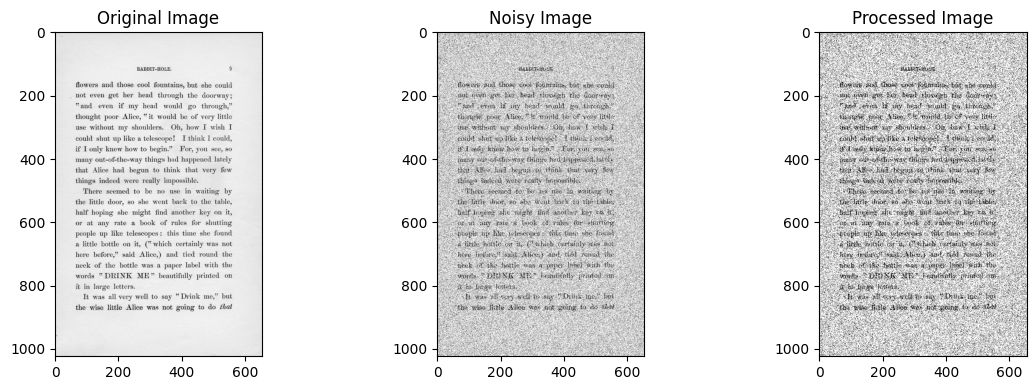

In [ ]:
for p in range(len(path_tuple)):
  output_save_version2(noisy_images[p],path_tuple[p],threshold_list[p],"High")